# Домашнее задание №1 - Изучение методов анализа и классификации данных
## Введение
В современном цифровом мире сети являются основными артериями, по которым передаются данные. Однако, наряду с легитимным трафиком, по сетям также передается и вредоносная информация. Для обеспечения безопасности и защиты информации необходимо эффективно обнаруживать и блокировать такие угрозы. Источником данных [`datasets/malicious.csv`](./datasets/malicious.csv) для нашего анализа послужил реальный сетевой трафик, содержащий трафик эксфильтрации данных.

- Эксфильтрация данных представляет собой скрытую передачу конфиденциальной информации за пределы защищенной сети.

## Описание задания
Цель данного задания — разработка и обучение моделей машинного обучения для классификации сетевых потоков на вредоносные и безопасные. Для этого мы будем использовать базовый алгоритм классификации, такой как `RandomForest`.

В рамках данной работы вам необходимо выполнить ряд действий, давайте приступим!

### Подготовка виртуального окружения Python
Предварительно нужно установить все зависимые модули. Все необходимые зависимости перечислены в requirements.txt файле. Чтобы установить зависимости, выполните в терминале следующую команду:
##```sh
##python3 -m pip install -r requirements.txt
##```

### Загрузить данные
Предварительно, необходимо загрузить исходные данные из файла [datasets/malicious.csv](datasets/malicious.csv). Можете воспользоваться функцией `load_data`, которая загрузит csv файл в объект pandas.DataFrame.

`pandas.DataFrame` — это двумерная табличная структура данных в библиотеке Pandas для языка программирования Python. Она представляет собой таблицу с рядами и столбцами, где каждый столбец может содержать данные различного типа (числа, строки, булевы значения и т.д.), подобно таблицам в реляционных базах данных или электронных таблицах. `pandas.DataFrame`  предоставляет очень удобный функционал по работе с табличными данными, что весьма ценно в области Машинного обучения.

### Изучение исходных данных
Когда у вас есть любые данные, после их загрузки необходимо провести первичный анализ, чтобы лучше понять их структуру и особенности. Это важно для дальнейшего построения моделей машинного обучения и выполнения различных аналитических задач. Ниже приведены основные шаги для исследования данных:

**Шаг 1**: Вывод общей информации о столбцах данных и их типах
Для начала, важно понять структуру вашего набора данных: сколько столбцов он содержит, какие у них названия и какие типы данных в них представлены. Это можно сделать с помощью метода `pandas.DataFrame.info()`, который предоставляет подробную информацию о DataFrame, включая количество записей, типы данных каждого столбца и количество ненулевых значений. 
Этот шаг поможет вам быстро сориентироваться в данных и определить, какие столбцы требуют дальнейшего внимания или предобработки.

**Шаг 2**: Вывод общей информации о данных в столбцах
Далее, стоит получить сводную статистическую информацию о данных в каждом столбце. Это можно сделать с помощью метода `pandas.DataFrame.describe()`, который предоставляет основные статистические показатели для числовых столбцов, такие как среднее значение, стандартное отклонение, минимальные и максимальные значения, а также квартильные значения.
Эти данные дают представление о распределении значений в каждом столбце и помогают выявить аномалии или выбросы.

**Шаг 3**: Проверка пропусков данных
Пропуски в данных могут значительно повлиять на качество анализа и моделей машинного обучения. Чтобы выявить наличие пропущенных значений, используйте метод `pandas.DataFrame.isnull().sum()`, который покажет количество пропущенных значений в каждом столбце.
Этот шаг позволяет определить, какие столбцы требуют обработки пропусков, например, заполнения средними значениями, медианами или удаления строк.

**Шаг 4**: Построение распределения исходных данных
Для визуализации распределения данных в каждом столбце можно использовать гистограммы: используйте метод `pandas.DataFrame.hist()`. Гистограмма показывает, как распределены значения в столбце, и помогает выявить схему распределения (например, нормальное распределение, смещение и т.д.). Гистограммы дают визуальное представление о плотности данных и позволяют быстро оценить общие тенденции.

**Шаг 5**: Построение boxplot
Для более детальной визуализации распределения данных можно использовать boxplot (или диаграммы размаха): `pandas.DataFrame.boxplot()`. Boxplot показывает медиану, квартильные значения, а также потенциальные выбросы.
`Boxplot` (или диаграмма размаха) — это графический метод отображения статистических данных, который позволяет визуализировать распределение набора данных и выявлять выбросы. Boxplot наглядно показывает центральное значение, разброс и симметрию распределения данных.

**Шаг 6**: Построение матрицы корреляции
Матрица корреляции помогает понять взаимосвязь между числовыми переменными в вашем наборе данных. Она показывает, как сильно связанные между собой переменные и позволяет выявить возможные зависимости или мультиколлинеарность.
Для построения матрицы корреляции используйте функцию `plot_corr_matrix()` для расчета корреляций между переменными, а затем визуализируйте ее с помощью тепловой карты.

**Шаг 7**: Определение соотношения классов в исходном наборе данных. Классы записаны в столбце `label`. Для начала определите сколько всего классов есть. После чего подсчитайте итоговое соотношение классов.

**Шаг 8**: Подведите итог исследования исходного набора данных, что вы наблюдаете? Какие столбцы из исходного набора данных могут быть использованы для дальнейшего обучения?

### Фильтрация данных
После выполнения анализа исходного набора данных, можно приступать к обработке исходных данных. Первым шагом чаще всего является фильтрация набора данных, удаление выбросов из исходного набора данных. 

Фильтрация данных — это ключевой шаг в подготовке данных для анализа и построения моделей машинного обучения. Неправильные или крайние значения могут сильно искажать результаты и приводить к ненадежным выводам. На этом шаге мы рассмотрим два популярных метода фильтрации данных: Boxplot и Z-оценка. Каждый из них имеет свои преимущества и может быть выбран в зависимости от характера данных и целей анализа.

Разделить DataFrame относительно классов, чтобы доминирующий класс не повлиял на фильтрацию данных меньших классов.

Отфильтруйте DataFrame полученных с прошлых шагов с использованием функций:
- `remove_outliers_quartile` фильтрация на основе квартилей, которые мы наблюдали при построение boxplot, значения находящиеся за усами будут отброшены (удаленны из исходного DataFrame)
- `remove_outliers_zscore` фильтрация на основе Z-оценки — это мера, которая показывает, насколько значение в наборе данных отклоняется от среднего значения этого набора, выраженная в стандартных отклонениях

После чего постройте boxplot полученного нового DataFrame. Что вы видите теперь, что-то изменилось?

### Преобразование данных
После фильтрации данных, следующим важным шагом является преобразование данных. Преобразование данных необходимо для подготовки данных к анализу и построению моделей машинного обучения. На этом шаге мы рассмотрим два основных метода преобразования данных: `StandardScaler` и `PowerTransformer`. Каждый из этих методов имеет свои особенности и применяется для решения различных задач.

Преобразование данных: Зачем это нужно?

Преобразование данных помогает нормализовать или стандартизировать данные, устраняя различия в масштабах и распределениях. Это важно для улучшения производительности моделей машинного обучения и повышения точности прогнозов. Преобразование данных может также помочь сделать данные более симметричными и привести их к нормальному распределению. Например, PCA предполагает многомерную нормальность распределения данных, аналогично K-NN чувствителен к масштабу и распределению данных.

`StandardScaler` — это метод стандартизации данных, который приводит их к нулевому среднему значению и единичному стандартному отклонению. Этот метод полезен, когда данные имеют разный масштаб или когда признаки имеют разные единицы измерения.

`PowerTransformer` — это метод преобразования данных, который применяется для улучшения симметрии распределения данных и приведения их к нормальному распределению. Это особенно полезно, когда данные имеют сильное смещение или отклонения от нормального распределения. В его основе лежит два типа преобразований: Box-Cox и Yeo-Johnson. Box-Cox требует положительных данных, тогда как Yeo-Johnson работает с любыми данными.

Воспользуйтесь обоими преобразованиями и постройте распределения признаков, после их преобразования.

### Обучение модели RandomForest
После фильтрации и преобразования данных мы готовы приступить к обучению модели. Для этого домашнего задания мы выберем модель RandomForest, которая хорошо справляется с задачами классификации и регрессии, обладает высокой устойчивостью к выбросам и способностью выявлять важные признаки.

`RandomForest` — это ансамблевый метод машинного обучения, который строит множество деревьев решений и объединяет их прогнозы для улучшения общей производительности. Модель RandomForest является устойчивой к переобучению, так как каждое дерево обучается на случайной подвыборке данных и использует случайный набор признаков.

Поскольку у нас имеется только один набор данных, то мы хотим протестировать модель полностью на нем усреднив результаты тестирования, воспользуемся для этого методом кросс-валидации.

Кросс-валидация — это метод оценки качества модели, при котором данные делятся на несколько частей (фолдов), и модель обучается на одной части, а тестируется на другой. Процесс повторяется несколько раз, чтобы каждая часть данных использовалась как для обучения, так и для тестирования. В результате мы получаем усреднённую оценку производительности модели, что делает её более надежной. Можете воспользоваться заготовленной функцией `cross_validation`.

## Ожидаемый результат
В качестве артефакта домашнего задания №1 должен выступать заполненный notebook, в рамках которого были произведены все расписанные шаги с пояснением, а также дамп обученной модели. Получить дамп модели довольно легко, воспользуйтесь `pickle.dumps()`

In [17]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from spyder_kernels.utils.lazymodules import pandas

In [18]:
def load_data(csv_file):
    df = pd.read_csv(csv_file)
    df = df.iloc[:, 1:]

    df.dropna(inplace=True)

    return df

In [19]:
def plot_corr_matrix(df):
    # Построение матрицы корреляции
    correlation_matrix = df[df.select_dtypes(include=['float64', 'int64']).columns].corr()
    
    # Визуализация матрицы корреляции
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Матрица корреляции')
    plt.show()

In [20]:
def remove_outliers_quartile(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]

In [21]:
def cross_validation(clf, X, y):
    """
    Выполняет кросс-валидацию для модели RandomForest и возвращает результаты точности на каждом этапе,
    а также наилучшую обученную модель с максимальной точностью.

    Параметры:
    - clf (Модель классификации, например, RandomForest)
    - X (DataFrame или массив): Признаки (features) набора данных.
    - y (Series или массив): Метки классов (targets) набора данных.

    Возвращает:
    - accuracy_scores(list): Массив точностей на каждом фолде.
    - best_сlf  (тип исходной модели): Наилучший экземпляр полученный на кросс-валидации
    """
    skf = StratifiedKFold(n_splits=3)
    accuracy_scores = []
    clfs = []
    for train, test in skf.split(X, y):
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        clfs.append(clf)
    return accuracy_scores, clfs[max(enumerate(accuracy_scores),key=lambda x: x[1])[0]]

In [22]:
df = load_data('datasets/malicious.csv')

### Вывод общей информации о столбцах данных и их типах
Для начала, важно понять структуру вашего набора данных: сколько столбцов он содержит, какие у них названия и какие типы данных в них представлены. Это можно сделать с помощью метода `pandas.DataFrame.info()`, который предоставляет подробную информацию о DataFrame, включая количество записей, типы данных каждого столбца и количество ненулевых значений.
Этот шаг поможет вам быстро сориентироваться в данных и определить, какие столбцы требуют дальнейшего внимания или предобработки.


In [26]:
pd.DataFrame.info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Flow                      7793 non-null   object 
 1   max_interpacket_interval  7793 non-null   float64
 2   min_interpacket_interval  7793 non-null   float64
 3   avg_interpacket_interval  7793 non-null   float64
 4   sum_interpacket_interval  7793 non-null   float64
 5   max_packet_length         7793 non-null   int64  
 6   min_packet_length         7793 non-null   int64  
 7   avg_packet_length         7793 non-null   float64
 8   sum_packet_length         7793 non-null   int64  
 9   mode_packet_length        7793 non-null   int64  
 10  label                     7793 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 669.8+ KB


### Вывод общей информации о данных в столбцах
Далее, стоит получить сводную статистическую информацию о данных в каждом столбце. Это можно сделать с помощью метода `pandas.DataFrame.describe()`, который предоставляет основные статистические показатели для числовых столбцов, такие как среднее значение, стандартное отклонение, минимальные и максимальные значения, а также квартильные значения.
Эти данные дают представление о распределении значений в каждом столбце и помогают выявить аномалии или выбросы.

In [48]:
df.describe(include='all')

,Flow,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length,label
count,7793,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7.793000e+03,7793.000000,7793
unique,7793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,97.68.56.122:57851<-->89.22.59.116:443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7001
mean,NaN,21.054863,0.000029,1.475881,85.327339,1218.559990,55.283203,333.035265,2.837903e+05,218.704350,NaN
std,NaN,84.173814,0.000284,6.185053,467.197598,686.357496,14.435200,260.551161,2.831104e+06,436.239806,NaN
min,NaN,0.002255,0.000000,0.000157,0.004650,66.000000,54.000000,56.285714,1.740000e+02,54.000000,NaN
25%,NaN,1.262620,0.000000,0.031585,2.219447,571.000000,54.000000,129.785714,1.837000e+03,54.000000,NaN
50%,NaN,8.511493,0.000000,0.512731,11.867484,1464.000000,54.000000,303.711864,7.124000e+03,54.000000,NaN
75%,NaN,15.180139,0.000000,1.080536,47.757424,1514.000000,54.000000,395.777778,1.319600e+04,55.000000,NaN


### Проверка пропусков данных.
Пропуски в данных могут значительно повлиять на качество анализа и моделей машинного обучения. Чтобы выявить наличие пропущенных значений, используйте метод `pandas.DataFrame.isnull().sum()`, который покажет количество пропущенных значений в каждом столбце. Этот шаг позволяет определить, какие столбцы требуют обработки пропусков, например, заполнения средними значениями, медианами или удаления строк.


In [49]:
df.isnull().sum()

Flow                        0
max_interpacket_interval    0
min_interpacket_interval    0
avg_interpacket_interval    0
sum_interpacket_interval    0
max_packet_length           0
min_packet_length           0
avg_packet_length           0
sum_packet_length           0
mode_packet_length          0
label                       0
dtype: int64

### Построение распределения исходных данных.
Для визуализации распределения данных в каждом столбце можно использовать гистограммы: используйте метод `pandas.DataFrame.hist()`. Гистограмма показывает, как распределены значения в столбце, и помогает выявить схему распределения (например, нормальное распределение, смещение и т.д.). Гистограммы дают визуальное представление о плотности данных и позволяют быстро оценить общие тенденции.

array([[<Axes: title={'center': 'max_interpacket_interval'}>,
        <Axes: title={'center': 'min_interpacket_interval'}>,
        <Axes: title={'center': 'avg_interpacket_interval'}>],
       [<Axes: title={'center': 'sum_interpacket_interval'}>,
        <Axes: title={'center': 'max_packet_length'}>,
        <Axes: title={'center': 'min_packet_length'}>],
       [<Axes: title={'center': 'avg_packet_length'}>,
        <Axes: title={'center': 'sum_packet_length'}>,
        <Axes: title={'center': 'mode_packet_length'}>]], dtype=object)

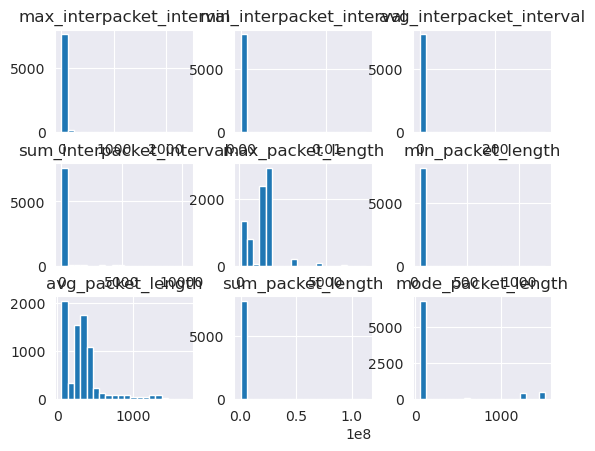

In [55]:
df.hist(bins=20)

### Построение boxplot
Для более детальной визуализации распределения данных можно использовать boxplot (или диаграммы размаха): `pandas.DataFrame.boxplot()`. Boxplot показывает медиану, квартильные значения, а также потенциальные выбросы.
*`Boxplot` (или диаграмма размаха) — это графический метод отображения статистических данных, который позволяет визуализировать распределение набора данных и выявлять выбросы. Boxplot наглядно показывает центральное значение, разброс и симметрию распределения данных.

<Axes: >

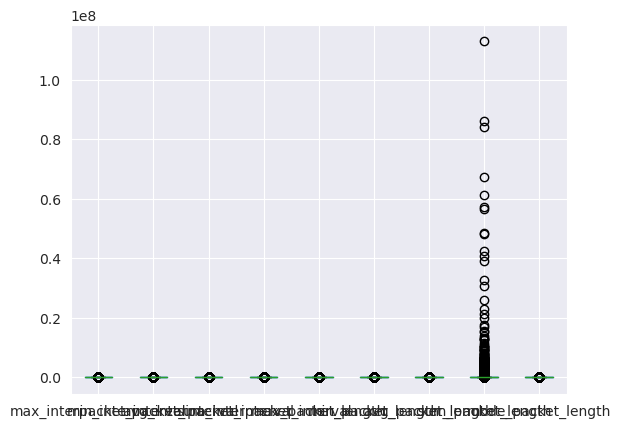

In [56]:
df.boxplot()

### Построение матрицы корреляции
Матрица корреляции помогает понять взаимосвязь между числовыми переменными в вашем наборе данных. Она показывает, как сильно связанные между собой переменные и позволяет выявить возможные зависимости или мультиколлинеарность.
Для построения матрицы корреляции используйте функцию `plot_corr_matrix()` для расчета корреляций между переменными, а затем визуализируйте ее с помощью тепловой карты.

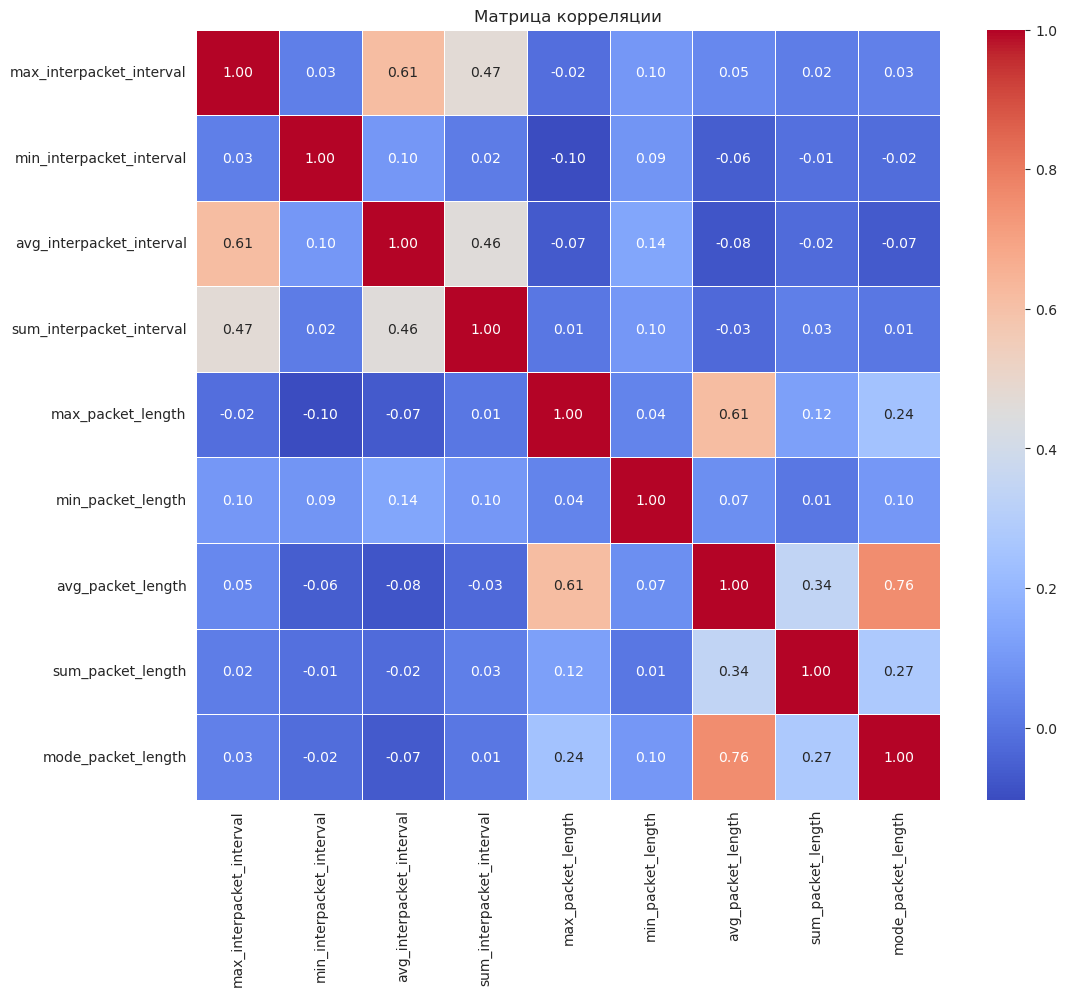

In [35]:
plot_corr_matrix(df)

### Определение соотношения классов в исходном наборе данных. Классы записаны в столбце `label`. Для начала определите сколько всего классов есть. После чего подсчитайте итоговое соотношение классов.

#### Определение количества уникальных классов

In [43]:
unique_classes = df['label'].unique()
num_classes = len(unique_classes)
print(f"Всего классов: {num_classes}")

Всего классов: 2


#### Подсчитаем количества экземпляров каждого класса

In [45]:
class_counts = df['label'].value_counts()
print(f"Всего количество классов: {class_counts}")


Всего количество классов: label
normal       7001
malicious     792
Name: count, dtype: int64


#### Вычисление доли каждого класса от общего числа записей

In [59]:
total_records = len(df)
class_ratios = class_counts / total_records
for label, ratio in class_ratios.items():
    print(f"Класс '{label}': {ratio:.4f}")

Класс 'normal': 0.8984
Класс 'malicious': 0.1016


#### Количество уникальных значений в категориальных признаках

In [60]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}\n")

Flow: ['97.68.56.122:57851<-->89.22.59.116:443'
 '57.181.239.188:49345<-->247.209.38.226:443'
 '123.47.11.54:53083<-->112.93.224.70:443' ...
 '61.225.152.29:50200<-->229.199.5.56:443'
 '119.61.220.97:50206<-->20.235.187.145:443'
 '78.249.70.167:50212<-->234.39.221.155:443']

label: ['normal' 'malicious']



In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Разделим данные на признаки и целевую переменную
X = df.drop(['label'], axis=1)
y = df['label']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка модели
accuracy = model.score(X_test, y_test)
print("Точность модели:", accuracy)

Точность модели: 0.8838999358563181


/home/vitaly/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Итоговый анализ
На основе проведенного анализа можно сделать следующие выводы:
1. Количественные признаки:
Определенное количество числовых признаков может быть использовано для моделирования. Обратите внимание на те признаки, которые имеют высокую корреляцию с целевой переменной.
2. Категориальные признаки:
Категориальные признаки были закодированы с помощью метода LabelEncoder. Эти признаки также могут быть включены в модель.
3. Корреляция:
Признаки с высокой корреляцией между собой могут быть избыточными и их стоит исключить, чтобы избежать мультиколлинеарности.
4. Пропущенные значения:
Если в данных присутствуют пропуски, необходимо решить, как с ними поступить: удалить строки с пропусками, заполнить их средними значениями или использовать специальные методы обработки пропущенных данных.